In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

In [ ]:
    # Define the paths for the dataset
    dataset_dir = 'horh'  # Folder containing "horse" and "human" subfolders
    # Data augmentation and normalization
    datagen = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.2)
    train_data = datagen.flow_from_directory(dataset_dir, target_size=(150, 150), batch_size=32, class_mode='binary', subset='training')
    test_data = datagen.flow_from_directory(dataset_dir, target_size=(150, 150), batch_size=32, class_mode='binary', subset='validation')

Found 822 images belonging to 2 classes.
Found 205 images belonging to 2 classes.


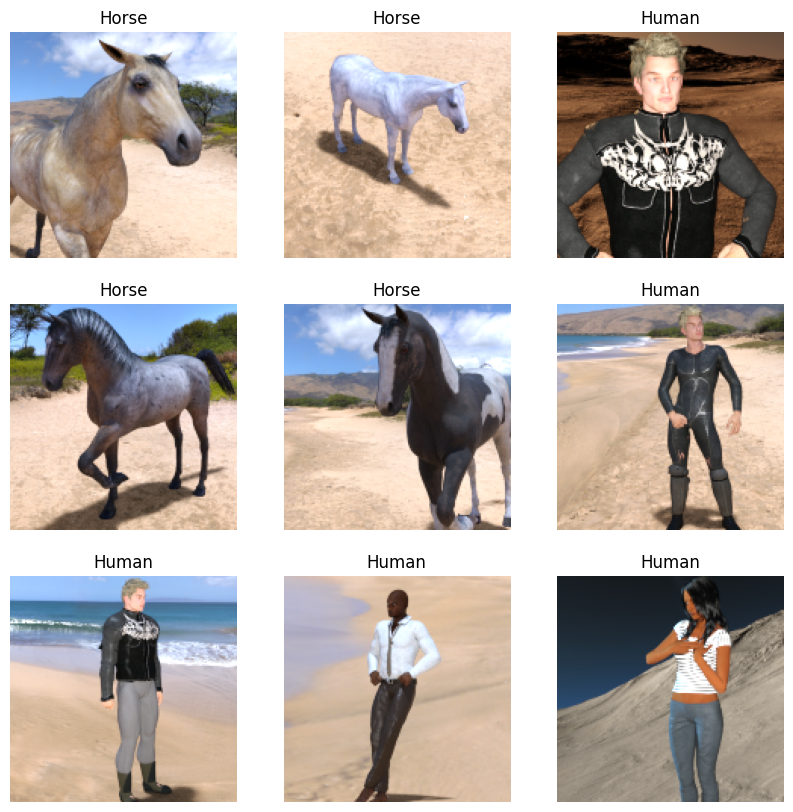

In [4]:
def visualize_samples(data):
    data.reset()
    plt.figure(figsize=(10, 10))
    for i in range(9):
        images, labels = next(data)
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title('Horse' if labels[i] == 0 else 'Human')
        plt.axis('off')
    plt.show()
visualize_samples(train_data)

In [9]:
def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),  # Prevent overfitting
        Dense(1, activation='sigmoid')  # Binary classification
    ])
    return model

In [10]:
model = create_model()
model.summary()

c:\Users\Harsh\OneDrive\Desktop\Semester 7\Deep Learning - Tcp\Lab\Mid-model Exam\myvenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Can experiment with different learning rates
              loss='binary_crossentropy',  # For binary classification
              metrics=['accuracy'])

In [12]:
history = model.fit(train_data, epochs=10, validation_data=test_data, verbose=1)

c:\Users\Harsh\OneDrive\Desktop\Semester 7\Deep Learning - Tcp\Lab\Mid-model Exam\myvenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.5348 - loss: 0.7723 - val_accuracy: 0.5854 - val_loss: 0.7050
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 26s 984ms/step - accuracy: 0.6983 - loss: 0.5818 - val_accuracy: 0.7854 - val_loss: 0.4334
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 26s 983ms/step - accuracy: 0.7818 - loss: 0.4730 - val_accuracy: 0.6976 - val_loss: 0.5313
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 25s 955ms/step - accuracy: 0.8633 - loss: 0.3110 - val_accuracy: 0.7854 - val_loss: 0.4418
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.8761 - loss: 0.2559 - val_accuracy: 0.6927 - val_loss: 0.6976
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8883 - loss: 0.2377 - val_accuracy: 0.8195 - val_loss: 0.4244
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9247 - loss: 0.1752 - val_accuracy: 0.7707 - val_loss: 0.4711
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.9268 - loss: 0.1799 - val_accuracy: 0.8341 - 

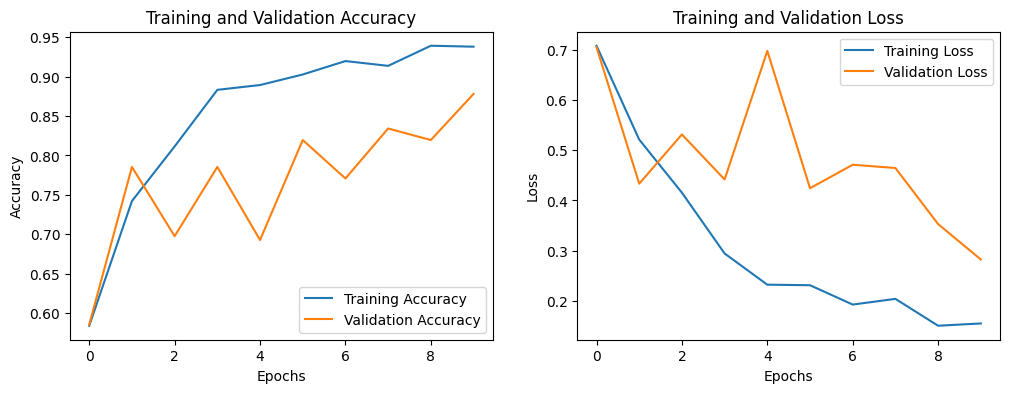

In [13]:
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 381ms/step


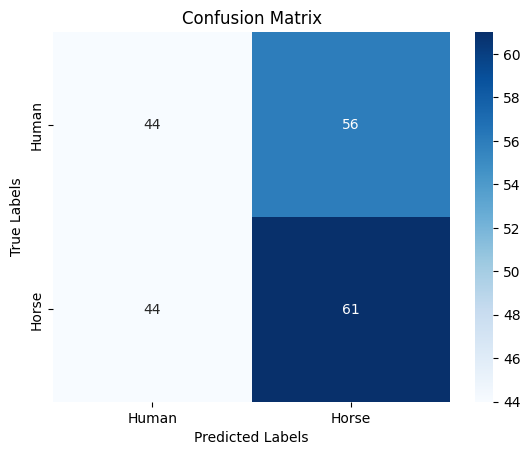

In [20]:
# Predict on test data
test_data.reset()
predictions = (model.predict(test_data) > 0.5).astype("int32")

# Get true labels
true_labels = test_data.classes

# Confusion Matrix
conf_matrix = confusion_matrix(true_labels, predictions)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=['Human', 'Horse'], yticklabels=['Human', 'Horse'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [21]:
# Accuracy on test set
accuracy = accuracy_score(true_labels, predictions)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 51.22%
